## Binary classification with 2 features - Adult Dataset

In [28]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [30]:
from ucimlrepo import fetch_ucirepo

#fetch dataset 
adult = fetch_ucirepo(id = 2)

#data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

#metadata
print(adult.metadata)

#variable information 
print(adult.variables)

#Concating the 2 dataswets into a combined df
adult_df = pd.concat([X,y], axis = 1 )

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [33]:
#Ensuring that we only have 2 different values of income classification 
adult_df["income"].value_counts()

#Using np.where() to return elements chosen from 0 or 1 dependding on the condition being satisfied
adult_df["income"] = np.where((adult_df["income"] == "<=50K") | (adult_df["income"] == "<=50K."), 0, 1)

#Now only keep the 3 columns of interest
adult_df = adult_df[["education-num", "age", "income"]]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


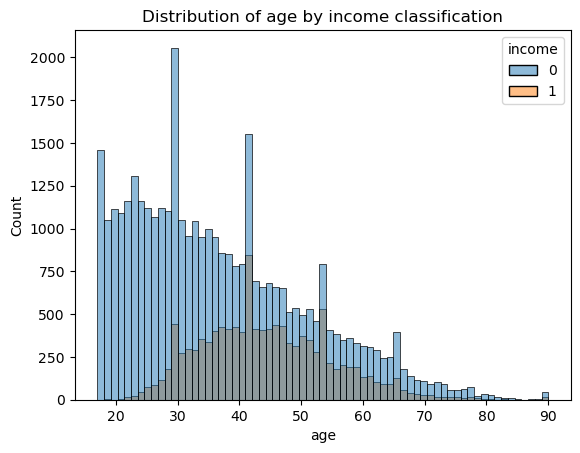

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


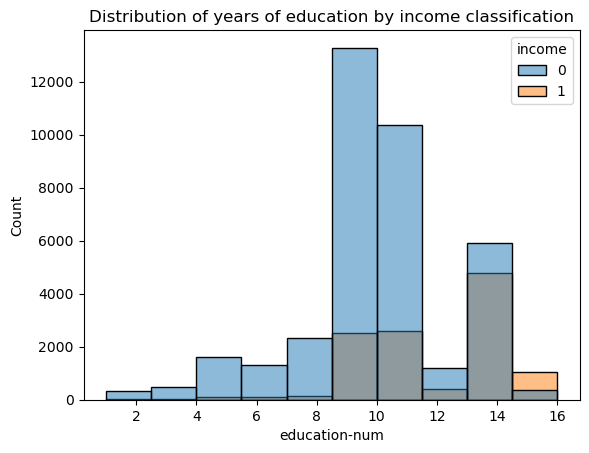

In [35]:
#Visualising the feature distribution by class
sns.histplot(data = adult_df, x = "age", hue = "income")
plt.title("Distribution of age by income classification")
plt.show()
sns.histplot(data = adult_df, x = "education-num", hue = "income", bins = 10)
plt.title("Distribution of years of education by income classification")
plt.show()


In [37]:
#Separating target from data
from sklearn.model_selection import train_test_split
X_data = adult_df[["education-num", "age"]]
y_data = adult_df["income"]
#Creating a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state = 130, test_size = 0.2)

In [39]:
#Making a pipelien and standardizing and then applying logistic regression 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#Creating the pipeline 
logistic_regression = make_pipeline(StandardScaler(), LogisticRegression())

#Fitting the data- passing the data through the pipeline 
logistic_regression.fit(X_train, y_train)

#Assessing the accuracy on the test set
score = logistic_regression.score(X_test, y_test)
print(f"Accuracy is: {score}" )

Accuracy is: 0.7765380284573651


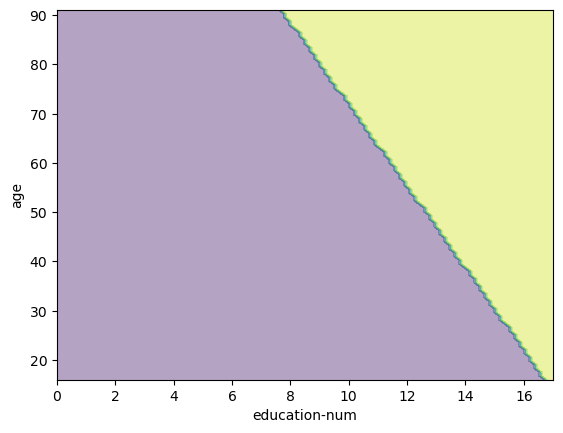

In [40]:
#Using the class Decision Boundary Display to gain insights by plotting the decision funcrtion boundary learned by the classifier in a 2 dimensional feature space
#All parameters stored as attributes
from sklearn.inspection import DecisionBoundaryDisplay
disp = DecisionBoundaryDisplay.from_estimator(logistic_regression, X_train, response_method = "predict", alpha = 0.4)
plt.show()